In [4]:
import cv2
import numpy as np

import sys
import os
from pathlib import Path
import pathlib

sys.path.insert(0, "../scripts")

In [2]:
import vis
import utils

import importlib
import pandas as pd

importlib.reload(vis)
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\user\\Desktop\\analysed.ai\\table_extraction_from_docs\\notebooks\\../scripts\\utils.py'>

In [14]:
DATASET_PATH = "../datasets/images_coordinates"

In [15]:
ann_df = pd.read_csv("../datasets/images_coordinates/Coordinates.csv")

In [16]:
unique_names = ann_df["Name"].unique()

In [17]:
for ind, name in enumerate(unique_names):
    df_s = ann_df[ann_df["Name"] == name]
    # print(df_s)
    img = cv2.imread(f"../datasets/images_coordinates/{name}", cv2.IMREAD_GRAYSCALE)
    mask = np.zeros_like(img)
    for i, a in df_s.iterrows():
        mask[a.y_min:a.y_max, a.x_min:a.x_max] = 255
    # vis.colanshow(img, mask, fac=50)
    b_n, ext = os.path.splitext(name)
    cv2.imwrite(f"../datasets/ann_images/{name}", img)
    cv2.imwrite(f"../datasets/ann_masks/{b_n}_mask.jpg", mask)
    print(f"{len(unique_names)}/{ind+1}", end="\r")

399 images

In [3]:
import json

In [4]:
with open("../datasets/399_annotated_images/train/_annotations.coco.json", "r") as f:
    ann_json = json.load(f)

In [5]:
DS_399_PATH = "../datasets/399_annotated_images/train/"

In [7]:
for i, l in enumerate(ann_json["images"]):
    img = cv2.imread(DS_399_PATH + l["file_name"], cv2.IMREAD_GRAYSCALE)
    mask = np.zeros_like(img)
    for ann in ann_json["annotations"]:
        if ann["image_id"] == l["id"]:
            x1, y1, x2, y2 = ann["bbox"][0], ann["bbox"][1], ann["bbox"][0] + ann["bbox"][2], ann["bbox"][1] + ann["bbox"][3]
            mask[round(y1):round(y2), round(x1):round(x2)] = 255

    # vis.colanshow(img, mask, fac=30)
    # if i == 2:
    #     break
    
    name = l["file_name"]
    b_n, ext = os.path.splitext(l["file_name"])
    cv2.imwrite(f"../datasets/ann_images/{name}", img)
    cv2.imwrite(f"../datasets/ann_masks/{b_n}_mask.jpg", mask)
    print(f"{len(ann_json['images'])}/{i+1}", end='\r')

In [49]:
ann_json["annotations"]

[{'id': 0,
  'image_id': 0,
  'category_id': 1,
  'bbox': [276, 243, 1158.26, 1611.1599999999999],
  'area': 1866142.1815999998,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 1,
  'image_id': 1,
  'category_id': 1,
  'bbox': [267, 1540, 991.6000000000001, 300.34000000000015],
  'area': 297817.1440000002,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 2,
  'image_id': 2,
  'category_id': 1,
  'bbox': [130, 316, 1423.54, 724.5299999999999],
  'area': 1031397.4361999998,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 3,
  'image_id': 2,
  'category_id': 1,
  'bbox': [505, 1239, 642.8899999999999, 168.63999999999987],
  'area': 108416.9695999999,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 4,
  'image_id': 3,
  'category_id': 1,
  'bbox': [278, 269, 1142.1, 174.40999999999997],
  'area': 199193.66099999993,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 5,
  'image_id': 3,
  'category_id': 1,
  'bbox': [236, 472, 455.31000000000006, 395.0899999999999],
  'area': 179888.42789999998,
  '

In [ ]:
cv2.imread()

Annotate.v1i.coco images

In [1]:
import json

In [2]:
with open("../datasets/table detection.v3i.coco/train/_annotations.coco.json", "r") as f:
    ann_json = json.load(f)

In [5]:
for i, l in enumerate(ann_json["images"]):
    img = cv2.imread("../datasets/table detection.v3i.coco/train/" + l["file_name"], cv2.IMREAD_GRAYSCALE)
    mask = np.zeros_like(img)

    for ann in ann_json["annotations"]:
        if ann["image_id"] == l["id"]:
            x1, y1, x2, y2 = ann["bbox"][0], ann["bbox"][1], ann["bbox"][0] + ann["bbox"][2], ann["bbox"][1] + ann["bbox"][3]
            mask[round(y1):round(y2), round(x1):round(x2)] = 255

    # vis.colanshow(img, mask, fac=30)
    # if i == 2:
    #     break
    
    name = l["file_name"]
    b_n, ext = os.path.splitext(l["file_name"])
    # cv2.imwrite(f"../datasets/annv1_images/{name}", img)
    cv2.imwrite(f"../datasets/annv2_masks/{b_n}_mask.jpg", mask)
    print(f"{len(ann_json['images'])}/{i+1}", end='\r')

In [9]:
import json
import cv2
import numpy as np

In [10]:
with open("../datasets/Test_data/test/_annotations.coco.json", "r") as f:
    ann_json = json.load(f)

In [11]:
for i, l in enumerate(ann_json["images"]):
    img = cv2.imread("../datasets/Test_data/test/" + l["file_name"], cv2.IMREAD_GRAYSCALE)
    mask = np.zeros_like(img)

    found = False
    for ann in ann_json["annotations"]:
        if ann["image_id"] == l["id"]:
            x1, y1, x2, y2 = ann["bbox"][0], ann["bbox"][1], ann["bbox"][0] + ann["bbox"][2], ann["bbox"][1] + ann["bbox"][3]
            mask[round(y1):round(y2), round(x1):round(x2)] = 255
            found = True

    # vis.colanshow(img, mask, fac=30)
    # if i == 2:
    #     break
    
    if found:
        name = l["file_name"]
        b_n, ext = os.path.splitext(l["file_name"])
        # cv2.imwrite(f"../datasets/annv1_images/{name}", img)
        cv2.imwrite(f"../datasets/test_masks/{b_n}_mask.jpg", mask)
    print(f"{len(ann_json['images'])}/{i+1}", end='\r')

In [14]:
import json
import cv2
import numpy as np

In [18]:
inds = [
    [85, 214, 547, 284],
    [75, 516, 561, 369]
]

In [19]:
sam = cv2.imread(r"C:\Users\user\Downloads\table detection fix.v1i.coco\train\94_29_jpg.rf.6b326d824d6b50dd6f241c9dcd18fa62.jpg", cv2.IMREAD_GRAYSCALE)

In [20]:
mask = np.zeros_like(sam)
for ind in inds:
    mask[ind[1]:ind[1]+ind[3], ind[0]:ind[0]+ind[2]] = 255

In [25]:
cv2.imwrite("94_29_mask.jpg", mask)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - imwrite() missing required argument 'img' (pos 2)
>  - imwrite() missing required argument 'img' (pos 2)


In [21]:
from PIL import Image

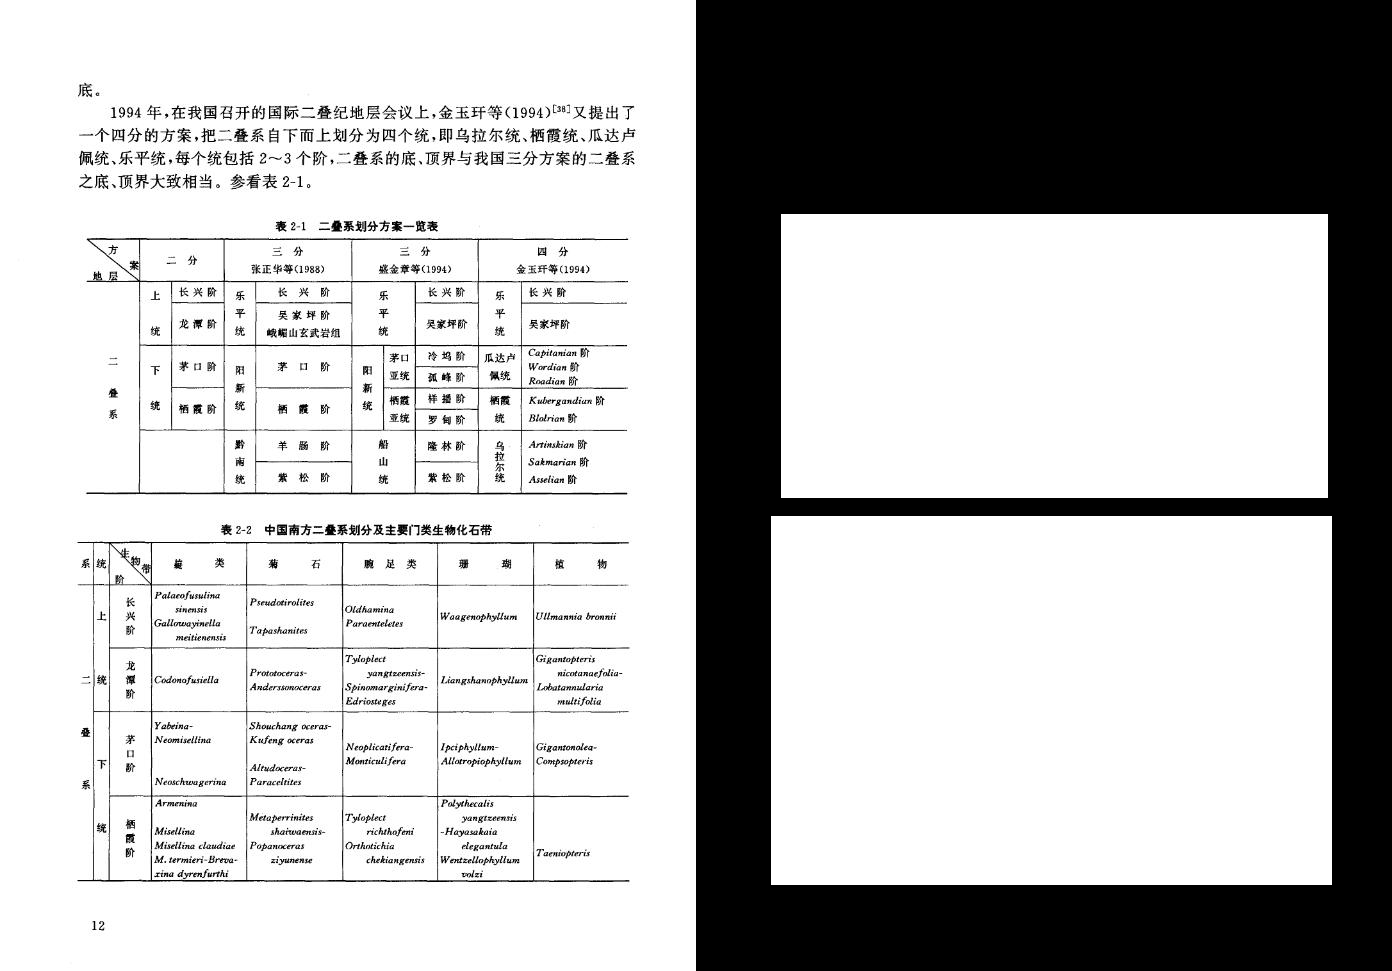

In [24]:
Image.fromarray(
    cv2.hconcat([
        sam, mask
    ]))

Roboflow other ds

In [8]:
import json
import cv2
import numpy as np

In [14]:
with open("../datasets/Table Extraction PDF.v6-tablebordersonly-augmented-accurate-model.coco/valid/_annotations.coco.json", "r") as f:
    ann_json = json.load(f)

In [15]:
for i, l in enumerate(ann_json["images"]):
    img = cv2.imread("../datasets/Table Extraction PDF.v6-tablebordersonly-augmented-accurate-model.coco/valid/" + l["file_name"], cv2.IMREAD_GRAYSCALE)
    mask = np.zeros_like(img)

    found = False
    for ann in ann_json["annotations"]:
        if ann["image_id"] == l["id"]:
            x1, y1, x2, y2 = ann["bbox"][0], ann["bbox"][1], ann["bbox"][0] + ann["bbox"][2], ann["bbox"][1] + ann["bbox"][3]
            mask[round(y1):round(y2), round(x1):round(x2)] = 255
            found = True

    # vis.colanshow(img, mask, fac=30)
    # if i == 2:
    #     break
    
    if found:
        name = l["file_name"]
        b_n, ext = os.path.splitext(l["file_name"])
        # cv2.imwrite(f"../datasets/annv1_images/{name}", img)
        cv2.imwrite(f"../datasets/pdf_v6_masks/{b_n}_mask.jpg", mask)
    print(f"{len(ann_json['images'])}/{i+1}", end='\r')